### EAL-24b. EMPRESAS DE 50 A 499 TRABAJADORES QUE PROPORCIONARON FORMACIÓN A SUS TRABAJADORES, SEGÚN GRADO DE LIMITACIÓN A LA FORMACIÓN  QUE SUPUSIERON CIERTOS MOTIVOS

In [45]:
import pandas as pd
from pathlib import Path

carpeta_excels = Path.home() / "Escritorio" / "excels_EAL"
datos_combinados = []

for archivo in carpeta_excels.glob("*.xls*"):
    if archivo.name.startswith("~$"):
        continue
    try:
        # Si es Tablas_EAL_2023.xlsx, recorta de la fila 38 a la 48 (Python usa base 0, así que iloc[37:48])
        if archivo.name == "Tablas_EAL_2023.xlsx":
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = df.iloc[38:48].copy()  # Filas 38 a 48 (inclusive)
        else:
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = df.iloc[36:44].copy()  # Filas 37 a 44 (inclusive)
        df_recorte["Fuente"] = archivo.stem  # Añadir columna con nombre del archivo
        datos_combinados.append(df_recorte)
        print(f"✅ Filas extraídas de {archivo.name}")
    except Exception as e:
        print(f"❌ Error con {archivo.name}: {e}")

# Combinar todos los DataFrames
df_final = pd.concat(datos_combinados, ignore_index=True)

# Mostrar una muestra
print("\n🧾 Muestra del DataFrame combinado:")
print(df_final.head())

✅ Filas extraídas de TABLAS_EAL_2019.xls
✅ Filas extraídas de TABLAS_EAL_2020.xls
✅ Filas extraídas de TABLAS_EAL_2021.xlsx
✅ Filas extraídas de Tablas_EAL_2022.xlsx
✅ Filas extraídas de Tablas_EAL_2023.xlsx

🧾 Muestra del DataFrame combinado:
                                                                                                                          0  \
0                                El nivel de formación de los empleados era el apropiado para las necesidades de la empresa   
1  La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas   
2                                                         Dificultad para evaluar la necesidades de formación de la empresa   
3                                                                   La falta de cursos de formación adecuados en el mercado   
4                                                                                  El alto coste de los cursos de formaci

In [46]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: muestra todo el ancho (evita recortes por pantalla estrecha)
pd.set_option('display.width', None)

# Opcional: ajusta el ancho máximo de cada columna si es muy largo
pd.set_option('display.max_colwidth', None)

In [47]:
# Renombrar las columnas 0 a 5
df_final.rename(columns={
    0: 'motivo',
    1: 'total',
    2: 'nada',
    3: 'poco',
    4: 'bastante',
    5: 'mucho'
}, inplace=True)

# Mostrar

In [48]:
df_final

,motivo,total,nada,poco,bastante,mucho,Fuente
0,El nivel de formación de los empleados era el apropiado para las necesidades de la empresa,100,12.398,37.376,42.619,7.607,TABLAS_EAL_2019
1,"La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas",100,18.038,40.795,34.398,6.769,TABLAS_EAL_2019
2,Dificultad para evaluar la necesidades de formación de la empresa,100,28.04,57.486,12.867,1.607,TABLAS_EAL_2019
3,La falta de cursos de formación adecuados en el mercado,100,23.58,50.058,22.226,4.136,TABLAS_EAL_2019
4,El alto coste de los cursos de formación,100,16.85,43.884,30.803,8.463,TABLAS_EAL_2019
5,El mayor esfuerzo realizado en años anteriores para ofrecer formación a sus trabajadores,100,20.628,55.046,21.584,2.743,TABLAS_EAL_2019
6,La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa,100,8.014,26.505,44.376,21.105,TABLAS_EAL_2019
7,Dificultad para acceder a ayudas o subvenciones públicas,100,21.394,48.876,21.942,7.788,TABLAS_EAL_2019
8,El nivel de formación de los empleados era el apropiado para las necesidades de la empresa,100,13.333,21.38,56.102,9.185,TABLAS_EAL_2020
9,"La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas",100,28.636,33.101,32.248,6.015,TABLAS_EAL_2020


In [49]:
# Busca la(s) fila(s) que contienen exactamente ese texto en la columna 'motivo'
filtro = df_final['motivo'] == "El nivel de formación de los empleados era el apropiado para las necesidades de la empresa"
df_formacion_apropiada = df_final[filtro].copy()

# Si quieres resetear el índice:
df_formacion_apropiada.reset_index(drop=True, inplace=True)

# Mostrar el resultado
print(df_formacion_apropiada)

                                                                                       motivo  \
0  El nivel de formación de los empleados era el apropiado para las necesidades de la empresa   
1  El nivel de formación de los empleados era el apropiado para las necesidades de la empresa   
2  El nivel de formación de los empleados era el apropiado para las necesidades de la empresa   
3  El nivel de formación de los empleados era el apropiado para las necesidades de la empresa   
4  El nivel de formación de los empleados era el apropiado para las necesidades de la empresa   

  total    nada    poco bastante  mucho           Fuente  
0   100  12.398  37.376   42.619  7.607  TABLAS_EAL_2019  
1   100  13.333   21.38   56.102  9.185  TABLAS_EAL_2020  
2   100   9.499  31.274    51.16  8.067  TABLAS_EAL_2021  
3   100    8.51  25.285   57.866  8.339  Tablas_EAL_2022  
4   100   8.112  24.769   57.497  9.622  Tablas_EAL_2023  


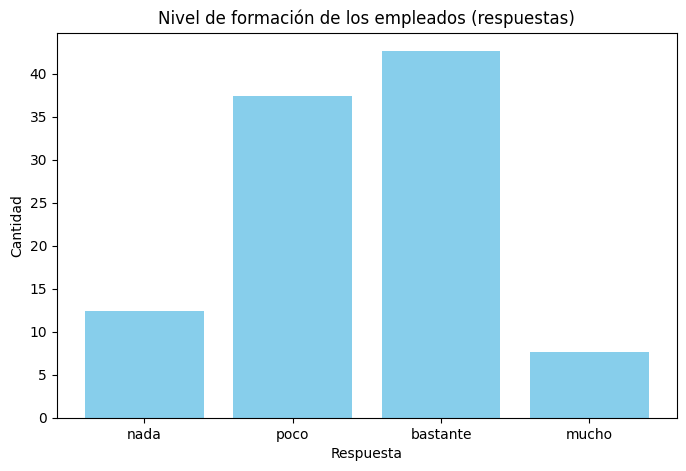

In [50]:
import matplotlib.pyplot as plt

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_formacion_apropiada.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('Nivel de formación de los empleados (respuestas)')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

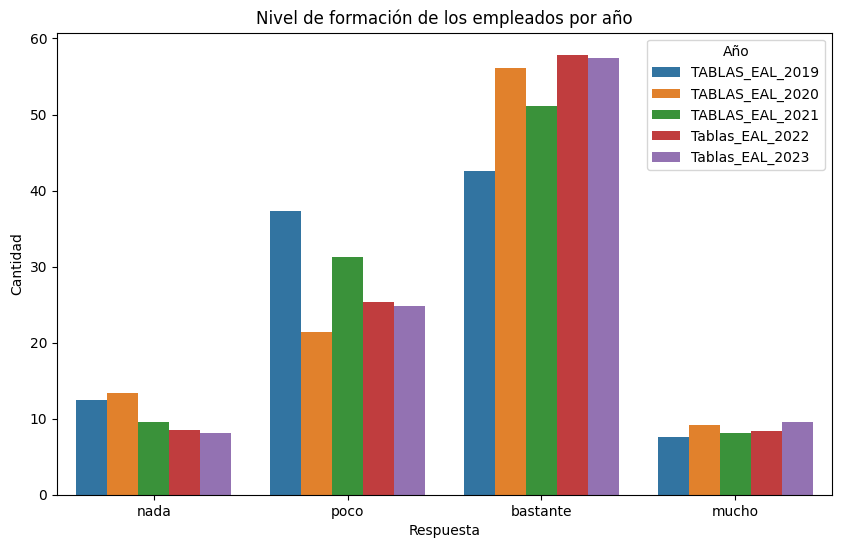

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'Fuente']
df_plot = df_formacion_apropiada[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='Fuente', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='Fuente')
plt.title('Nivel de formación de los empleados por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()